# Experiment and path specification

In [196]:
# Specify the experiment for analysis
# experiment='cxic00318'
# runNumber = 123
# experiment='cxix40218'
experiment='cxilu9218'
# runNumber=31 # includes cspad info
# runNumber=32 # includes cspad info
runNumber=33 # includes cspad info
runNumber=29 # includes cspad info
runNumber=28 # includes cspad info
runNumber=27 # includes cspad info
runNumber=26 # includes cspad info
runNumber=14 # includes cspad info
runNumber=13 # includes cspad info
runNumber=21 # includes cspad info
runNumber=37 # includes cspad info
runNumber=39 # includes cspad info
runNumber=49 # includes cspad info
runNumber=50 # includes cspad info
runNumber=14 # includes cspad info
runNumber=49 # includes cspad info
runNumber=73 # includes cspad info
# runNumber=21 # includes cspad info
# runNumber=9 # includes cspad info


# Set the installation and output path
import os
os.environ['INSTALLPATH']= '/cds/home/m/mrware/TRXS-dev/TRXS-Run18v3'
os.environ['OUTPUTPATH']= '/cds/data/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

In [197]:
# x,y = CSPADgeometry(detType='Jungfrau', run=runNumber, experiment=experiment)

In [198]:
# np.savez('detgeom',x=x,y=y)

In [199]:
detGeom = np.load('/cds/home/m/mrware/TRXS-dev/TRXS-Run18v3/Template-Notebooks/detgeom.npz')
x = detGeom['x']
y = detGeom['y']
r = np.sqrt(y**2+x**2)
rMax = 1e5
NR = 20
dr = float(rMax)/float(NR)
idx = 20
np.sum((r>idx*dr)&(r< (idx+1)*dr ) )

76291

# Import Libraries

In [200]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *

# Determine current user
currentUser, error = unixCMD("echo $USER")
currentUser = currentUser.strip()
print(currentUser)
os.environ['RESULTSPATH']= ('/cds/data/psdm/%s/%s/results/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

mrware


# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [201]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsLibraries')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

## Grabbing point data across nodes

In [202]:
detDict = {
    'uvint':{'name': 'Acqiris','get-function':'getAcqirisSum2'},
           'uvint1':{'name': 'Acqiris','get-function':'getAcqirisSum1'},
           'gasPressure':{'name': 'CXI:MKS670:READINGGET','get-function':'getGasPressure'},
           'xrayEnergy':{'name':'FEEGasDetEnergy','get-function': 'getXrayEnergy' },
           'ebeamcharge':{'name':'EBeam', 'get-function': 'getEbeamCharge'},
          'stageencoder':{'name':'CXI:LAS:MMN:04.RBV','get-function':'getStageEncoder'},
          'ttfltpos':{'name':'CXI:TIMETOOL:FLTPOS', 'get-function': 'getTTFltPos'},
          'vitpos':{'name':'LAS:FS5:VIT:FS_TGT_TIME_DIAL', 'get-function': 'getTTFltPos'},
           'xint':{'name':'CxiDg3_Imb01','get-function': 'getIPM' },
           'xpos':{'name':'CxiDg3_Imb01','get-function': 'getXPos' },
           'ypos':{'name':'CxiDg3_Imb01','get-function': 'getYPos' },
          'seconds':{'name':'seconds', 'get-function': 'getSeconds'},
          'nanoseconds':{'name':'nanonseconds', 'get-function': 'getNanoseconds'},
          'fiducials':{'name':'fiducials', 'get-function': 'getFiducials'},
#           'roi1':{'name':'jungfrau4M', 'get-function': 'getCSPADsum1'},
#           'roi2':{'name':'jungfrau4M', 'get-function': 'getCSPADsum2'},
#           'roi3':{'name':'jungfrau4M', 'get-function': 'getCSPADsum3'},
#           'roi4':{'name':'jungfrau4M', 'get-function': 'getCSPADsum4'},
#           'roi4':{'name':'jungfrau4M', 'get-function': 'getCSPADsum4'},
#           'rois':{'name':'jungfrau4M', 'get-function': 'getCSPADrois'},
          'rois':{'name':'jungfrau4M', 'get-function': 'getRadialrois'},
          'laserOn':{'name':'evr1', 'get-function': 'getLaserOn'},
          'xrayOn':{'name':'evr1', 'get-function': 'getXrayOn'},
          'photonHist':{'name':'jungfrau4M', 'get-function': 'getPhotonHistogram'}
          }



NSHOTS = 60000
ngrab = 200
rank = int( float(NSHOTS)/float(ngrab) )
print('Grabbing %d shots, %d events at a time, on %d nodes' %(NSHOTS,ngrab,rank))
batchThreads = batchPointDataGrabber( detDict, eventMax=int(rank*ngrab), experiment=experiment, runNumber=runNumber, rank=int(rank) )
# batchThreads.Queue = 'psanaq'
batchThreads.Queue = 'psfehhiprioq'
batchThreads.RunType = 'python2'
batchThreads.start()

Grabbing 60000 shots, 200 events at a time, on 300 nodes


## Check job status

In [203]:
stdoutdata, stderrdata = bjobs()
print stdoutdata
print stderrdata



No unfinished job found

Deleting the old output file ...
Output: 
Error: None
Deleting the old executable file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=1000]" -q psfehhiprioq -o /cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/pointData-run73-temp0.out /cds/home/m/mrware/TRXS-dev/TRXS-Run18v3/Libraries/pythonBatchMagic/BatchWrapper.sh python2 /cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Python/pointData-run73-temp0.py; exit'
Deleting the old output file ...
Output: 
Error: None
Deleting the old executable file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=1000]" -q psfehhiprioq -o /cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/pointData-run73-temp1.out /cds/home/m/mrware/TRXS-dev/TRXS-Run18v3/Libraries/pythonBatchMagic/BatchWrapper.sh python2 /cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Python/pointData-run73-temp1.py; exit'
Output: Job <400526> is submitted to queue <psfehhiprioq>.

Error: 
Deleti

Exception in thread Thread-2861:
Traceback (most recent call last):
  File "/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/cds/home/m/mrware/TRXS-dev/TRXS-Run18v3/Libraries/pythonBatchMagic/lclsBatch.py", line 226, in run
    self.gather()
  File "/cds/home/m/mrware/TRXS-dev/TRXS-Run18v3/Libraries/pythonBatchMagic/lclsBatch.py", line 289, in gather
    for key in self.detArrays.keys():
AttributeError: 'NoneType' object has no attribute 'keys'



## Kill threads if they die

In [190]:
batchThreads.requestStop()
# time.sleep(5)
stdoutdata, stderrdata = bkill(killAll=True)
print stdoutdata
print stderrdata


No unfinished job found



In [191]:
batchThreads.status

'Finished'

In [192]:
batchThreads.gather()

/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber0-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber1-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber2-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber3-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber4-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber5-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber6-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber7-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber8-run-18 remembered!
/cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch/Output/nodePointDataGrabber9-run-18 remembered!
/cds/data/psdm/cxi/c

## Drop empty array values

In [193]:
batchThreads.detArrays['rois'].shape

(10000, 20)

In [194]:
pointData = batchThreads.detArrays
# print pointData

def dropEmpty(pointData):

    pdc = {}
    filledBin = (pointData['seconds'] > 0)

    for key in pointData.keys():
        try:
            pdc[key]= np.copy(pointData[key][filledBin,:])
        except IndexError as ie:
            pdc[key]= np.copy(pointData[key][filledBin] )
        
    return pdc

def dropNaN(pointData):
    goodBin = np.ones(pointData['seconds'].shape, dtype=bool)
    for key in pointData.keys():
        try:
            NX, NY = pointData[key].shape
            print(pointData[key].shape)
            goodBin = goodBin & ~np.isnan( np.sum(pointData[key],-1 ) )
        except Exception:
            goodBin = goodBin & ~np.isnan( pointData[key].astype(float) )
            
    for key in pointData.keys():
        try:
            pointData[key]=pointData[key][goodBin,:] 
        except IndexError as ie:
            pointData[key]=pointData[key][goodBin] 
    return pointData

print len(pointData['seconds'])
pointData_masked = dropNaN(dropEmpty(pointData))
print 'Number of good shots: ', len(pointData_masked['seconds'])
print( np.sum( (pointData['seconds'] > 0) ) )

10000
(10000, 20)
(10000, 200)
Number of good shots:  6150
10000


## Save point data

In [195]:
save_obj( pointData, os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber )

In [135]:
print(os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber)

/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-49


In [70]:
# pointData = load_obj(os.environ['RESULTSPATH']+'/pointData-run-%d' % 38)

## Plot histogram of result

(45400,)


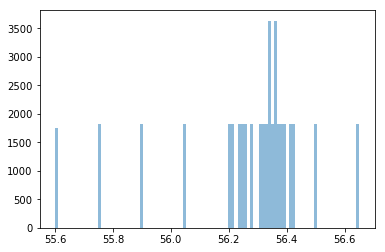

In [71]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['stageencoder'], bins=100,normed=False, alpha=0.5);
print(detArrays['xrayEnergy'].shape)
# plt.savefig('runfolder/hist-xrayenergy')

Text(0,0.5,'counts')

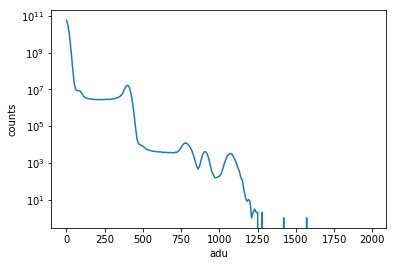

In [72]:
adu = np.arange(200) * 10
plt.semilogy(adu, np.nansum(detArrays['photonHist'],0));
plt.xlabel('adu')
plt.ylabel('counts')
# plt.xlim(250,500)

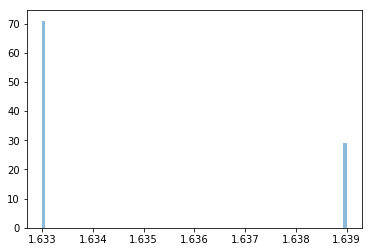

In [21]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['gasPressure'], bins=100,normed=False, alpha=0.5);
# print(detArrays['xrayEnergy'].shape)
# plt.savefig('runfolder/hist-xrayenergy')

In [22]:
detArrays['rois']

array([[0.        , 1.1114012 , 0.82386255, ..., 0.05006197, 0.03277071,
        0.06934683],
       [0.        , 0.64059311, 0.62039781, ..., 0.03635807, 0.02092938,
        0.01313278],
       [0.        , 1.05933332, 0.72485119, ..., 0.0500378 , 0.0255477 ,
        0.03739964],
       ...,
       [0.        , 0.94693875, 0.84210634, ..., 0.03932896, 0.04256612,
        0.02679134],
       [0.        , 1.02289546, 0.64769518, ..., 0.02811663, 0.02622343,
        0.02953326],
       [0.        , 1.09631038, 0.9109028 , ..., 0.04952656, 0.03375819,
        0.0393985 ]])

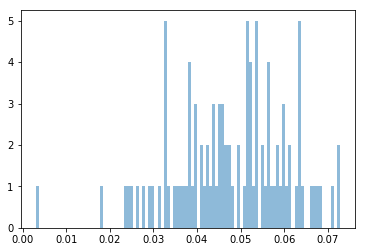

In [23]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['rois'][:,15], bins=100,normed=False, alpha=0.5);
# print(detArrays['xrayEnergy'].shape)
# plt.savefig('runfolder/hist-xrayenergy')

Text(0,0.5,'mean adu')

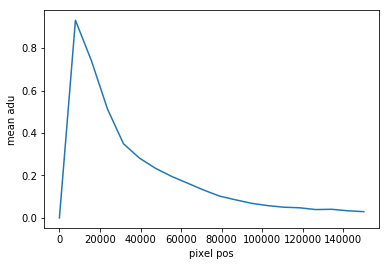

In [29]:
x = np.linspace(0,1.5e5, 20)
plt.plot(x,np.nanmean(detArrays['rois'][1:],0))
plt.xlabel('pixel pos')
plt.ylabel('mean adu')


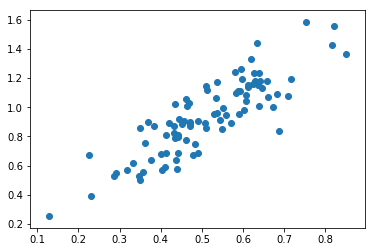

In [25]:
plt.scatter(detArrays['rois'][detArrays['xrayOn'].astype(bool),3],detArrays['rois'][detArrays['xrayOn'].astype(bool),1])

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <type 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

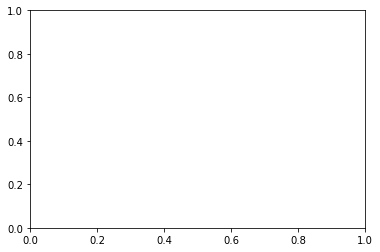

In [23]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['xrayOn'], bins=100,normed=False, alpha=0.5);

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

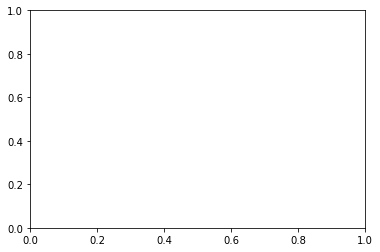

In [36]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['laserOn'], bins=100,normed=False, alpha=0.5);

# Get labtime to check for systematics

In [26]:
import datetime
import matplotlib.dates as dates
def getLabtime(second, microseconds):
    refdate = datetime.datetime(1970,1,1)
    td = datetime.timedelta(seconds=second,microseconds=microseconds)
    return refdate+td

labtime = np.array([getLabtime( s, float(ns)/1000. ) for s,ns in zip(detArrays['seconds'],detArrays['nanoseconds'])])

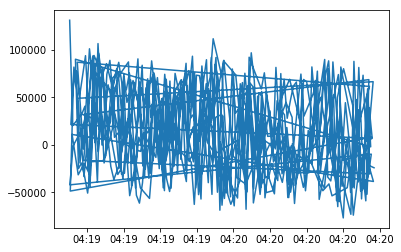

In [32]:
fig,ax= plt.subplots()
date_form = dates.DateFormatter('%H:%M', tz=None)
ax.plot(labtime, detArrays['roi1'], )
ax.xaxis.set_major_formatter(date_form)

# Check for correlation between rois

Text(0,0.5,'Jungfrau sum 1')

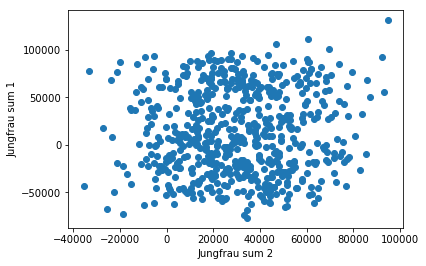

In [34]:
plt.scatter(detArrays['roi2'],detArrays['roi1'])
plt.xlabel('Jungfrau sum 2')
plt.ylabel('Jungfrau sum 1')

# Look at ROIs vs. stage position

In [18]:
goodIdx = detArrays['laserOn'] & detArrays['xrayOn'] & ( detArrays['rois'][:,10] > 0 )
pos = detArrays['stageencoder'][goodIdx] 
np.unique(pos)

NameError: name 'laserOn' is not defined

In [38]:
nb=5
bins = np.unique(pos)

counts,edges = np.histogram( pos,bins=np.unique(pos))
bins,edges = np.histogram( pos,bins=np.unique(pos), weights=(roi2)/(roi1+roi2+roi3))

Text(0,0.5,' roi1/roi2 ')

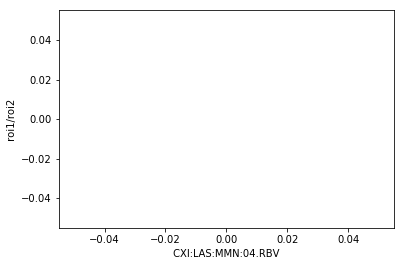

In [39]:
plt.plot(edges[1:] , bins/counts )
plt.xlabel(' CXI:LAS:MMN:04.RBV ')
plt.ylabel(' roi1/roi2 ')
# plt.savefig('run-13-t0.png')